#Algorithme de Berstein-Vazirani

Importations de librairies

In [6]:
from qiskit import QuantumCircuit, Aer, execute
from FonctionsCommune import decimal_in_bit_string
from qiskit.tools import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ
import numpy as np

Fonctions

Fonction de création des oracles

In [7]:
# Nous avons décidé de ne pas inclure le nombres de qubits en argument car nous
# avons changé la fonction decimal_in_bit_string qui n'en a donc plus besoin.

def oracle_berstein_vazirani(decimal):

    bits_string = decimal_in_bit_string(decimal)
    string_length = len(bits_string)

    qc = QuantumCircuit(string_length + 1, name=("Oracle " + bits_string))

    string_length = len(bits_string)

    #inverse le bits_string pour le mettre dans le bonne ordre
    bits_string = bits_string[::-1]

    for i in range(string_length):
        if bits_string[i] == '1':
            qc.cx(i, string_length)

    return qc

Fonction pour le circuit de Berstein-Vazirani

In [8]:
def bernstein_vazirani_create(decimal):

    bits_string = decimal_in_bit_string(decimal)
    string_length = len(bits_string)

    qc = QuantumCircuit(string_length + 1, string_length)

    qc.x(string_length)
    qc.h(string_length)

    for i in range(string_length):
        qc.h(i)

    qc.append(oracle_berstein_vazirani(decimal), range(0, string_length+1))

    for i in range(string_length):
        qc.h(i)

    qc.measure(range(string_length), range(string_length))

    return qc

Simulation du circuit

résultat attendu: 101000
résultat obtenue:
{'101000': 1000}
résultat attendu: 10001
résultat obtenue:
{'10001': 1000}
résultat attendu: 101000
résultat obtenue:
{'101000': 1000}
résultat attendu: 11101
résultat obtenue:
{'11101': 1000}
résultat attendu: 100010
résultat obtenue:
{'100010': 1000}


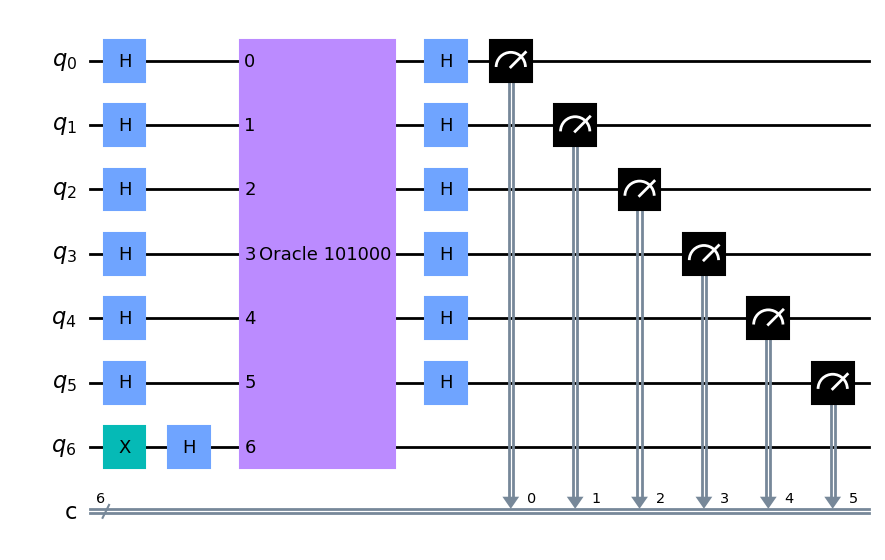

In [9]:
decimals = [np.random.randint(0,50) for i in range(5)]
bit_string_result = []

qasm_simulator = Aer.get_backend('qasm_simulator')

for decimal in decimals:

    job = execute(bernstein_vazirani_create(decimal), qasm_simulator, shots = 1000)
    counts = job.result().get_counts()

    print("résultat attendu: " + decimal_in_bit_string(decimal))
    print("résultat obtenue:")
    print(counts)

bernstein_vazirani_create(decimals[0]).draw('mpl')

Éxecution sur un ordinateur quantique de IBM

In [10]:
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub = 'ibm-q',group='open',project='main')
##provider = IBMQ.get_provider(hub = 'ibm-q-qida',group='is-quantum-hub',project='algolab')
#
#for backends in provider.backends(filters=lambda x: not x.configuration().simulator):
#    print(backends)
#
#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits < 10 and
#not x.configuration().simulator and x.status().operational==True))
#
#
#
#circuit_hasard = bernstein_vazirani_create(decimals[0])
#job = execute(circuit_hasard, backend, shots = 1000)
#job_monitor(job)
#counts = job.result().get_counts()
#print(counts)
#
#circuit_hasard.draw('mpl')